# Feature engineering 
is the process of transforming raw data into meaningful input features that improve the performance of a machine learning model. It involves:

#### Creating New Features: 
Generating new features based on domain knowledge, such as calculating ratios, differences, or aggregations.

#### Transforming Features: 
Applying mathematical transformations, scaling, or encoding categorical variables (e.g., one-hot encoding, label encoding).

#### Handling Missing Data: 
Filling in or dropping missing values.

#### Reducing Dimensionality: 
Using techniques like PCA to reduce the number of features while retaining important information.

#### Selecting Features: 
Identifying the most relevant features using methods like correlation analysis, feature importance, or recursive feature elimination (RFE).

 The goal is to enhance the quality and relevance of the data for better model performance.

## 5:41

## The Curse of Dimensionality 
refers to the challenges that arise when working with high-dimensional data, particularly in the context of:

#### 1. Model Training:
###### Data Sparsity: 
As the number of dimensions increases, the data points become sparse in the feature space, making it harder for the model to learn meaningful patterns.
###### Overfitting: 
High-dimensional data increases the risk of overfitting, as the model may learn noise instead of the underlying trends.
###### Computational Cost: 
More dimensions mean more complex computations, leading to longer training times and higher resource usage.

#### 2. Model Interpretation:
##### Reduced Interpretability: 
With many features, it becomes difficult to understand the contribution of each feature to the model’s predictions.
##### Feature Redundancy: 
High dimensions often introduce correlated or irrelevant features, complicating the interpretation of feature importance or decision boundaries.

### Solution:
Use dimensionality reduction (e.g., PCA, t-SNE) or feature selection techniques to reduce the number of features while preserving the data's essence. This helps improve model performance and interpretability.



## Techniques in feature engineering

### 1) Creating a New feature 

In [6]:
import pandas as pd
import numpy as np

In [7]:
# Define arrays
dist = np.array([1, 2, 3, 4, 5, 6, 7, 8])
speed = np.array([30, 24, 40, 90, 45, 69, 23, 57])

# Create a DataFrame by combining the arrays as columns
df1 = pd.DataFrame({'Dist': dist, 'Speed': speed})

# Display the DataFrame
print(df1)


   Dist  Speed
0     1     30
1     2     24
2     3     40
3     4     90
4     5     45
5     6     69
6     7     23
7     8     57


In [8]:
df1["Time"] = df1["Dist"] / df1["Speed"]

print(df1)


   Dist  Speed      Time
0     1     30  0.033333
1     2     24  0.083333
2     3     40  0.075000
3     4     90  0.044444
4     5     45  0.111111
5     6     69  0.086957
6     7     23  0.304348
7     8     57  0.140351


### 2) Modifying the existing feature

In [10]:
# Here  we will modify the exisiting feature time such that it should show only two ponts adter decimal
df1["Time"] = df1["Time"].round(2)
df1

,Dist,Speed,Time
0,1,30,0.03
1,2,24,0.08
2,3,40,0.08
3,4,90,0.04
4,5,45,0.11
5,6,69,0.09
6,7,23,0.30
7,8,57,0.14


## Feature Scalling 
is the process of standardizing or normalizing the range of independent variables (features) in a dataset to ensure they have comparable scales. Common methods include:

##### Normalization: 
Rescales values to a range of 0, 1.
##### Standardization: 
Rescales values to have a mean of 0 and standard deviation of 1.

#### Importance of Feature Scaling for Distance-Based Algorithms:
Distance-based algorithms (e.g., k-Nearest Neighbors, Support Vector Machines, K-Means) calculate distances (e.g., Euclidean) between data points.

##### Without scaling:
##### Dominance by Larger Scales: Features with larger ranges dominate the distance calculations, biasing the algorithm.
##### Misleading Results: Uneven feature scales can distort cluster formation, classification boundaries, or neighbor relationships.
Scaling ensures all features contribute equally to the model, improving accuracy and performance.

## 25:39

### Techniques of feature scalling

### 1) Standardization :
Standardization (also called Z-score normalization) rescales the data so that each feature has a mean of 0 and a standard deviation of 1.

z scaore = (xi - xbar)/std deviabtion(population)

In [16]:
### Code to demonstarte standardization
# Generate a range of ages from 5 to 100
import matplotlib.pyplot as plt
ages = np.arange(1, 10)
print(ages)
print(type(ages))

agess = np.array([4,2,3,4,6,7,4,6,4])
print(agess)
print(type(agess))



[1 2 3 4 5 6 7 8 9]
<class 'numpy.ndarray'>
[4 2 3 4 6 7 4 6 4]
<class 'numpy.ndarray'>


In [17]:
# Create a DataFrame with "ages" and "agess" as columns
df2 = pd.DataFrame({'Ages': ages, 'Agess': agess})

In [18]:
df2 = df2.drop("Agess",axis=1)

In [19]:
## Stardardization of ages 
Std_Ages = []
for x in df2["Ages"]:
    x = (x-df2["Ages"].mean())/(df2["Ages"].std())
    Std_Ages.append(x)

Std_Ages



[-1.4605934866804429,
 -1.0954451150103321,
 -0.7302967433402214,
 -0.3651483716701107,
 0.0,
 0.3651483716701107,
 0.7302967433402214,
 1.0954451150103321,
 1.4605934866804429]

In [20]:
df2["Std Ages"] = Std_Ages

In [21]:
df2

,Ages,Std Ages
0,1,-1.460593
1,2,-1.095445
2,3,-0.730297
3,4,-0.365148
4,5,0.000000
5,6,0.365148
6,7,0.730297
7,8,1.095445
8,9,1.460593


### 2) Normalization 
is the process of transforming data into a specific range, typically between 0 and 1. This is particularly useful when features have different units or scales and you want to make them comparable. Unlike standardization, which scales data based on the mean and standard deviation, normalization focuses on transforming the data into a fixed range.

In [23]:
# Normalization of ages using Min-Max scaling
Norm_Ages = []
for x in df2["Ages"]:
    x = (x - df2["Ages"].min()) / (df2["Ages"].max() - df2["Ages"].min())  # Min-Max normalization
    Norm_Ages.append(x)

# Display the normalized values
print(Norm_Ages)


[0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0]


In [24]:
# Adding the Norm_Ages list as a new column in df2
df2["Norm_Ages"] = Norm_Ages

# Display the updated DataFrame
df2

,Ages,Std Ages,Norm_Ages
0,1,-1.460593,0.000
1,2,-1.095445,0.125
2,3,-0.730297,0.250
3,4,-0.365148,0.375
4,5,0.000000,0.500
5,6,0.365148,0.625
6,7,0.730297,0.750
7,8,1.095445,0.875
8,9,1.460593,1.000


## 3) Feature Selection

In [26]:
## For this we can use iris datsaset 
from sklearn.datasets import fetch_california_housing

In [27]:
# Load the California housing dataset
california = fetch_california_housing()


In [28]:
# Create a DataFrame
df_california = pd.DataFrame(california.data, columns=california.feature_names)

# Add the target column to the DataFrame
df_california["MedHouseVal"] = california.target

In [29]:
df_california

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [30]:
corr = df_california.corr()

In [31]:
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


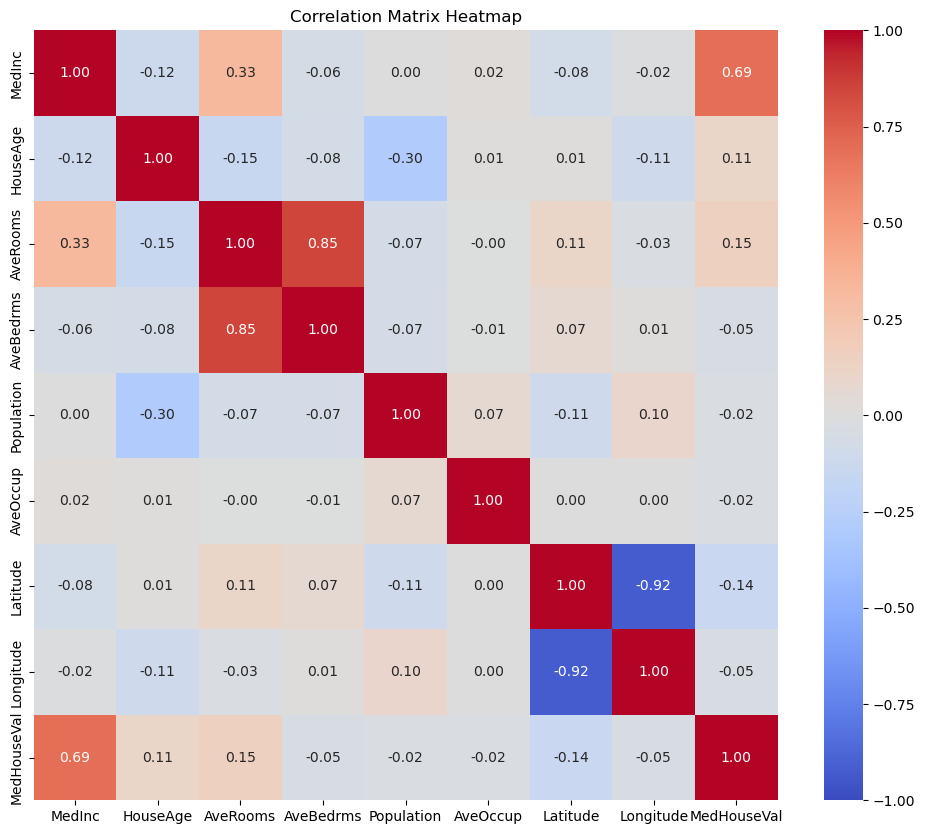

In [32]:
# Create a heatmap to visualize the correlation matrix
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, cbar=True)

# Add a title and display the plot
plt.title("Correlation Matrix Heatmap")
plt.show()

## Interpretation of Heat map 
## Since we can see the corr between latitude vs longitude is negative and very high, so we decided to keep only one feature out of both
## We can also observe that avg rooms vs avg bedrooms have very high positive corr, so we decide to only one feature out of both



## Before going for eliminating features lets determine if there exists multicolliearity

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming df_california is your DataFrame
# Add a constant to the features (for the intercept)
# X = add_constant(df_california)

# Create a DataFrame to store the VIF results
vif = pd.DataFrame()

# Iterate through the columns to calculate the VIF for each feature
# features = X.columns
vif['Feature'] = df_california.columns
vif_value= []

for i,x in enumerate(df_california.columns):
    valuez = variance_inflation_factor(df_california.values,i)
    vif_value.append(valuez)
    

# Display the VIF results
print(vif_value)


[19.62499781446958, 7.592662692610186, 47.9563513934456, 45.358192447574105, 2.9360782795808618, 1.0995301978289422, 568.497332024351, 640.0642113292109, 9.285658653476597]


In [37]:
df_vif = pd.DataFrame(df_california.columns,columns = ["Columns"])

In [38]:
df_vif["VIF"] = vif_value

In [77]:
df_vif

,Columns,VIF
0,MedInc,19.624998
1,HouseAge,7.592663
2,AveRooms,47.956351
3,AveBedrms,45.358192
4,Population,2.936078
5,AveOccup,1.099530
6,Latitude,568.497332
7,Longitude,640.064211
8,MedHouseVal,9.285659


In [40]:
# # Function to find the feature with the highest VIF
# def HighestVif():
#     # Find the maximum VIF value
#     high_vif = df_vif["VIF"].max()

#     # Iterate through the rows of df_vif to find the index of the highest VIF
#     for i in range(len(df_vif["Columns"])):  # Use "Feature" instead of "Columns"
#         if df_vif["VIF"].iloc[i] == high_vif:  # Compare VIF value with the maximum VIF
#             print(f"The feature with the highest VIF is: {df_vif['Columns'].iloc[i]} with VIF value: {high_vif}")
#             vif_feature = df_vif["Columns"].iloc[i]
#             break  # Exit the loop once we find the highest VIF
#     return vif_feature, high_vif

# # Call the function to get the highest VIF feature
# vif_feature, high_vif = HighestVif()

The feature with the highest VIF is: Longitude with VIF value: 640.0642113292109


In [41]:
# # Function to eliminate the feature with the highest VIF from df_california
# def eliminate_f(vif_feature):
#     global df_vif
#     # Drop the feature with the highest VIF from df_california
#     df_vif = df_vif.drop(columns=[vif_feature])
#     return df_vif

# # Call the function to eliminate the feature with the highest VIF
# df_vif_obj = eliminate_f(vif_feature)

# # Display the updated DataFrame
# print(df_vif)

In [73]:
df_california = df_california.drop(columns=["Longitude"])
df_california

In [102]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming df_california is your DataFrame
# Add a constant to the features (for the intercept)
# X = add_constant(df_california)

# Create a DataFrame to store the VIF results
vif = pd.DataFrame()

# Iterate through the columns to calculate the VIF for each feature
# features = X.columns
vif['Feature'] = df_california.columns
vif_value= []

for i,x in enumerate(df_california.columns):
    valuez = variance_inflation_factor(df_california.values,i)
    vif_value.append(valuez)
    

# Display the VIF results
print(vif_value)

df_vif = pd.DataFrame(df_california.columns,columns = ["Columns"])
df_vif["VIF"] = vif_value
df_vif

[18.63988854791724, 7.346582560856259, 44.71476021823799, 42.072000280757294, 2.796280372625213, 1.0993935116209208, 22.873933877032318, 9.19349965679354]


,Columns,VIF
0,MedInc,18.639889
1,HouseAge,7.346583
2,AveRooms,44.714760
3,AveBedrms,42.072000
4,Population,2.796280
5,AveOccup,1.099394
6,Latitude,22.873934
7,MedHouseVal,9.193500


In [104]:
df_california = df_california.drop(columns=["AveRooms"])
df_california

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Latitude,MedHouseVal
0,8.3252,41.0,1.023810,322.0,2.555556,37.88,4.526
1,8.3014,21.0,0.971880,2401.0,2.109842,37.86,3.585
2,7.2574,52.0,1.073446,496.0,2.802260,37.85,3.521
3,5.6431,52.0,1.073059,558.0,2.547945,37.85,3.413
4,3.8462,52.0,1.081081,565.0,2.181467,37.85,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,1.133333,845.0,2.560606,39.48,0.781
20636,2.5568,18.0,1.315789,356.0,3.122807,39.49,0.771
20637,1.7000,17.0,1.120092,1007.0,2.325635,39.43,0.923
20638,1.8672,18.0,1.171920,741.0,2.123209,39.43,0.847


In [106]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming df_california is your DataFrame
# Add a constant to the features (for the intercept)
# X = add_constant(df_california)

# Create a DataFrame to store the VIF results
vif = pd.DataFrame()

# Iterate through the columns to calculate the VIF for each feature
# features = X.columns
vif['Feature'] = df_california.columns
vif_value= []

for i,x in enumerate(df_california.columns):
    valuez = variance_inflation_factor(df_california.values,i)
    vif_value.append(valuez)
    

# Display the VIF results
print(vif_value)

df_vif = pd.DataFrame(df_california.columns,columns = ["Columns"])
df_vif["VIF"] = vif_value
df_vif

[10.58408132145666, 7.260587728119055, 6.440666647362755, 2.7627938446051488, 1.0987193809226696, 22.094483352143055, 8.674857789264124]


,Columns,VIF
0,MedInc,10.584081
1,HouseAge,7.260588
2,AveBedrms,6.440667
3,Population,2.762794
4,AveOccup,1.098719
5,Latitude,22.094483
6,MedHouseVal,8.674858


In [108]:
df_california = df_california.drop(columns=["Latitude"])
df_california

,MedInc,HouseAge,AveBedrms,Population,AveOccup,MedHouseVal
0,8.3252,41.0,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,1.081081,565.0,2.181467,3.422
...,...,...,...,...,...,...
20635,1.5603,25.0,1.133333,845.0,2.560606,0.781
20636,2.5568,18.0,1.315789,356.0,3.122807,0.771
20637,1.7000,17.0,1.120092,1007.0,2.325635,0.923
20638,1.8672,18.0,1.171920,741.0,2.123209,0.847


In [110]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming df_california is your DataFrame
# Add a constant to the features (for the intercept)
# X = add_constant(df_california)

# Create a DataFrame to store the VIF results
vif = pd.DataFrame()

# Iterate through the columns to calculate the VIF for each feature
# features = X.columns
vif['Feature'] = df_california.columns
vif_value= []

for i,x in enumerate(df_california.columns):
    valuez = variance_inflation_factor(df_california.values,i)
    vif_value.append(valuez)
    

# Display the VIF results
print(vif_value)

df_vif = pd.DataFrame(df_california.columns,columns = ["Columns"])
df_vif["VIF"] = vif_value
df_vif

[8.855104420345128, 4.15614499012339, 4.264252639074036, 2.22392581549881, 1.0986710054391546, 8.607338647921637]


,Columns,VIF
0,MedInc,8.855104
1,HouseAge,4.156145
2,AveBedrms,4.264253
3,Population,2.223926
4,AveOccup,1.098671
5,MedHouseVal,8.607339


In [ ]:
## Now we find all the VIF values are below 10